In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# Age : 비어 있는 값을 나이의 평균으로 채우기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [5]:
# Fare NaN을 평균으로 대체
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [6]:
# SibSp와 Parch를 더하여 Family size 생성
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch']
test_df['FamilySize'] = test_df['SibSp']+test_df['Parch']

In [7]:
train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [8]:
# Cabin(객실) 정보에서 번호만 삭제하고 알파벳만 남기기
train_df['Cabin']=train_df['Cabin'].str[0]
test_df['Cabin']=test_df['Cabin'].str[0]

In [9]:
train_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [10]:
test_df['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [11]:
# NaN 가장 많은 값으로 대체
train_df['Cabin'] = train_df['Cabin'].fillna('C')
test_df['Cabin'] = test_df['Cabin'].fillna('C')

In [12]:
# 문자를 숫자로 변환(C==>0 / B==>1 / D==>2 / E==>3)
# train_df.loc[train_df['Cabin'] == 'C', 'Cabin'] = 0
train_df['Cabin'] = train_df['Cabin'].map({
    'C' : 0,
    'B' : 1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7
})
test_df['Cabin'] = test_df['Cabin'].map({
    'C' : 0,
    'B' : 1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7
})

In [13]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [15]:
# Embarked의 문자를 숫자로 변환 S=> 0 / C=> 1 / Q => 2
train_df['Embarked'] = train_df['Embarked'].map({
    'S' : 0,
    'C' : 1,
    'Q' : 2
})
test_df['Embarked'] = test_df['Embarked'].map({
    'S' : 0,
    'C' : 1,
    'Q' : 2
})

In [16]:
train_df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [17]:
test_df['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [18]:
train_df['Sex']=train_df['Sex'].map({
    'male' : 0,
    'female' : 1
})
test_df['Sex']=test_df['Sex'].map({
    'male' : 0,
    'female' : 1
})

In [19]:
train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [20]:
test_df['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [21]:
# 필요없는 열 삭제 'Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'
train = train_df.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'])
test = test_df.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'])

In [22]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,0


In [23]:
# Training set
# 모델의 학습에 사용되는 데이터

# Validation set
# 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터

# Test set 모델의 최종 성능을 평가하기 위한 데이터

In [24]:
# 훈련용 데이터에서 데이터, label(target) 분리
train_data = train.drop('Survived', axis=1) # 학습용데이터
target_data = train['Survived'] # 학습용데이터의 label(target)
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,22.0,7.2500,0,0,1
1,1,1,38.0,71.2833,0,1,1
2,3,1,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,0,1
4,3,0,35.0,8.0500,0,0,0


In [25]:
target_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(train_data, target_data)
print(train_data.shape, X_train.shape, X_valid.shape)

(891, 7) (668, 7) (223, 7)


In [27]:
# sklearn 의 DecisionTreeClassifier를 사용하여 학습
from sklearn.tree import DecisionTreeClassifier
# DecisionTree로 모델 생성
tree_dec = DecisionTreeClassifier()
# 학습
tree_dec.fit(X_train, Y_train)

DecisionTreeClassifier()

In [28]:
print('training set accuracy :', tree_dec.score(X_train, Y_train))
print('Validation set accuracy :', tree_dec.score(X_valid, Y_valid))

training set accuracy : 0.9895209580838323
Validation set accuracy : 0.8116591928251121


In [29]:
# 만들어진 DecisionTree로 test 데이터 판단
prediction = tree_dec.predict(test)
prediction

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [30]:
submit = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : prediction
})
submit.to_csv('survived.csv', index=False)

In [31]:
pd.read_csv('survived.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[Text(690.6586450729926, 902.117142857143, 'Sex <= 0.5\ngini = 0.468\nsamples = 668\nvalue = [418, 250]\nclass = Unsurvived'),
 Text(440.4559762773722, 858.1114285714286, 'Fare <= 15.646\ngini = 0.298\nsamples = 434\nvalue = [355, 79]\nclass = Unsurvived'),
 Text(299.74680656934305, 814.1057142857144, 'Age <= 10.5\ngini = 0.165\nsamples = 265\nvalue = [241, 24]\nclass = Unsurvived'),
 Text(291.60082116788317, 770.1000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(307.8927919708029, 770.1000000000001, 'Cabin <= 1.5\ngini = 0.159\nsamples = 264\nvalue = [241, 23]\nclass = Unsurvived'),
 Text(283.45483576642334, 726.0942857142858, 'Fare <= 6.962\ngini = 0.15\nsamples = 257\nvalue = [236, 21]\nclass = Unsurvived'),
 Text(275.30885036496346, 682.0885714285715, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = Unsurvived'),
 Text(291.60082116788317, 682.0885714285715, 'Fare <= 7.01\ngini = 0.159\nsamples = 241\nvalue = [220, 21]\nclass = Unsurvived'),
 Text(

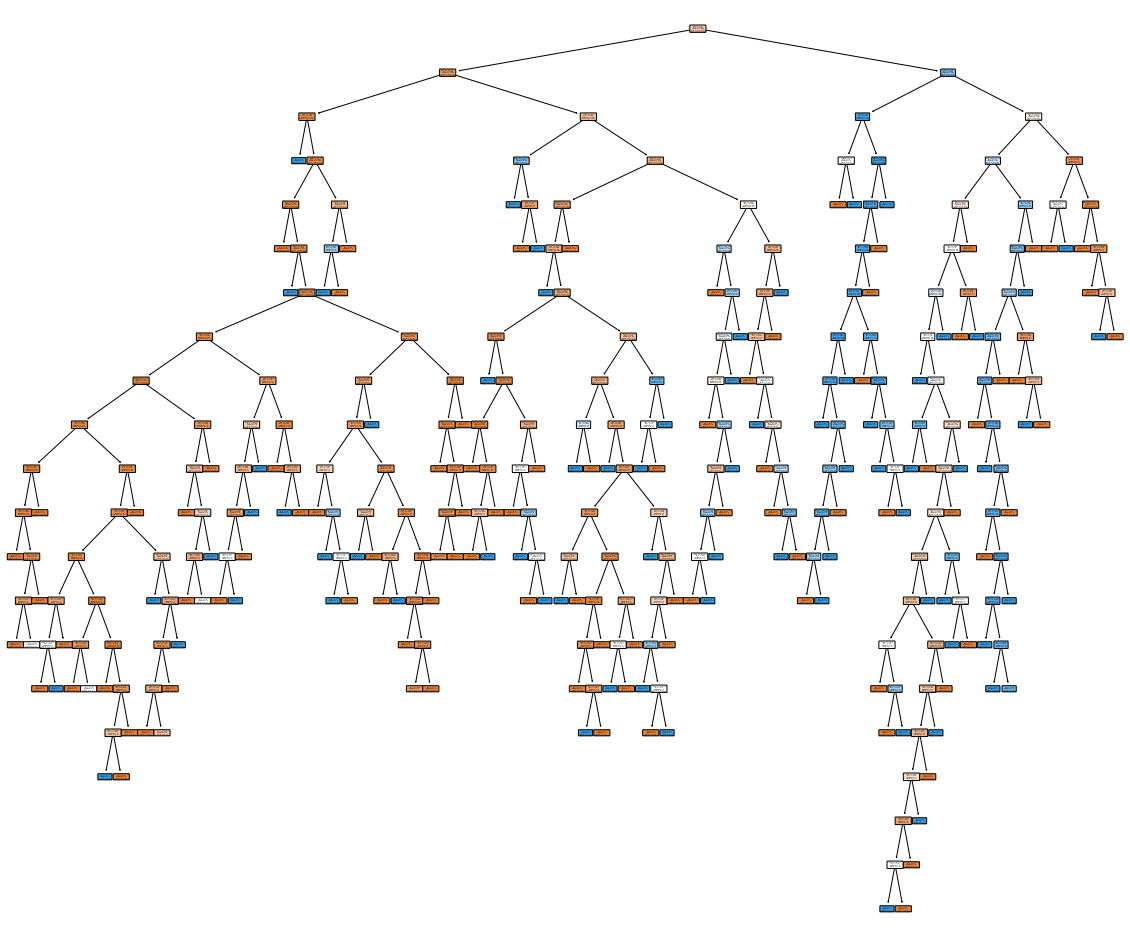

In [32]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 17))
feature_name=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize']
tree.plot_tree(tree_dec, class_names=['Unsurvived', 'Survived'], feature_names=feature_name, impurity=True, filled=True, rounded=True)

In [33]:
print('importance : ', tree_dec.feature_importances_)

importance :  [0.09725244 0.3016487  0.26023524 0.25879914 0.02727441 0.01563518
 0.03915489]


In [34]:
for name, value in zip(feature_name, tree_dec.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

Pclass: 0.097
Sex: 0.302
Age: 0.260
Fare: 0.259
Cabin: 0.027
Embarked: 0.016
FamilySize: 0.039


<AxesSubplot:>

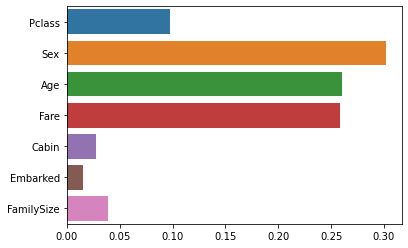

In [35]:
import seaborn as sns
sns.barplot(x=tree_dec.feature_importances_, y=feature_name)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [37]:
# parameters = {
#     'max_depth' : [8, 10, 12, 15],
#     'min_samples_split' : [4, 5, 7],
#     'min_samples_leaf' : [1, 2, 3]
# }
parameters = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split' : [4, 5, 6, 7, 8, 9],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
grid_dclf = GridSearchCV(tree_dec, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [38]:
grid_dclf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [39]:
print(f'GridSearchCV 최적 하이퍼 파라미터: {grid_dclf.best_params_}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [40]:
print(f'GridSearchCV 최고 정확도: {round(grid_dclf.best_score_, 4)}')

GridSearchCV 최고 정확도: 0.8113


In [41]:
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_valid)
accuracy = accuracy_score(Y_valid, dpredictions)

print(f'테스트 세트에서의 DecisionTreeClassifier정확도: {round(accuracy, 4)}')

테스트 세트에서의 DecisionTreeClassifier정확도: 0.7982


In [42]:
tree_dec.fit(X_train, Y_train)
dt_pred = tree_dec.predict(X_valid)
print('tree_dec DecisionTreeClassifier정확도 : {0:.4f}'.format(accuracy_score(Y_valid, dt_pred)))

tree_dec DecisionTreeClassifier정확도 : 0.8027


In [43]:
Y_valid.shape

(223,)

In [44]:
length = Y_valid.shape[0]
accuracy = accuracy_score(Y_valid, dt_pred)
print(f'총 {length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총 223명 중 80.269% 정확도로 생존을 맞춤


In [45]:
best_accuracy = accuracy_score(Y_valid, dpredictions)
print(f'총 {length}명 중 {best_accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총 223명 중 79.821% 정확도로 생존을 맞춤


[Text(558.0, 808.6050000000001, 'Sex <= 0.5\ngini = 0.468\nsamples = 668\nvalue = [418, 250]\nclass = Unsurvived'),
 Text(279.0, 577.575, 'Fare <= 15.646\ngini = 0.298\nsamples = 434\nvalue = [355, 79]\nclass = Unsurvived'),
 Text(139.5, 346.5450000000001, 'Cabin <= 1.5\ngini = 0.165\nsamples = 265\nvalue = [241, 24]\nclass = Unsurvived'),
 Text(69.75, 115.51499999999999, 'gini = 0.15\nsamples = 257\nvalue = [236, 21]\nclass = Unsurvived'),
 Text(209.25, 115.51499999999999, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = Unsurvived'),
 Text(418.5, 346.5450000000001, 'Age <= 3.5\ngini = 0.439\nsamples = 169\nvalue = [114, 55]\nclass = Unsurvived'),
 Text(348.75, 115.51499999999999, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = Survived'),
 Text(488.25, 115.51499999999999, 'gini = 0.408\nsamples = 154\nvalue = [110, 44]\nclass = Unsurvived'),
 Text(837.0, 577.575, 'Pclass <= 2.5\ngini = 0.393\nsamples = 234\nvalue = [63, 171]\nclass = Survived'),
 Text(697.5, 346.545000000000

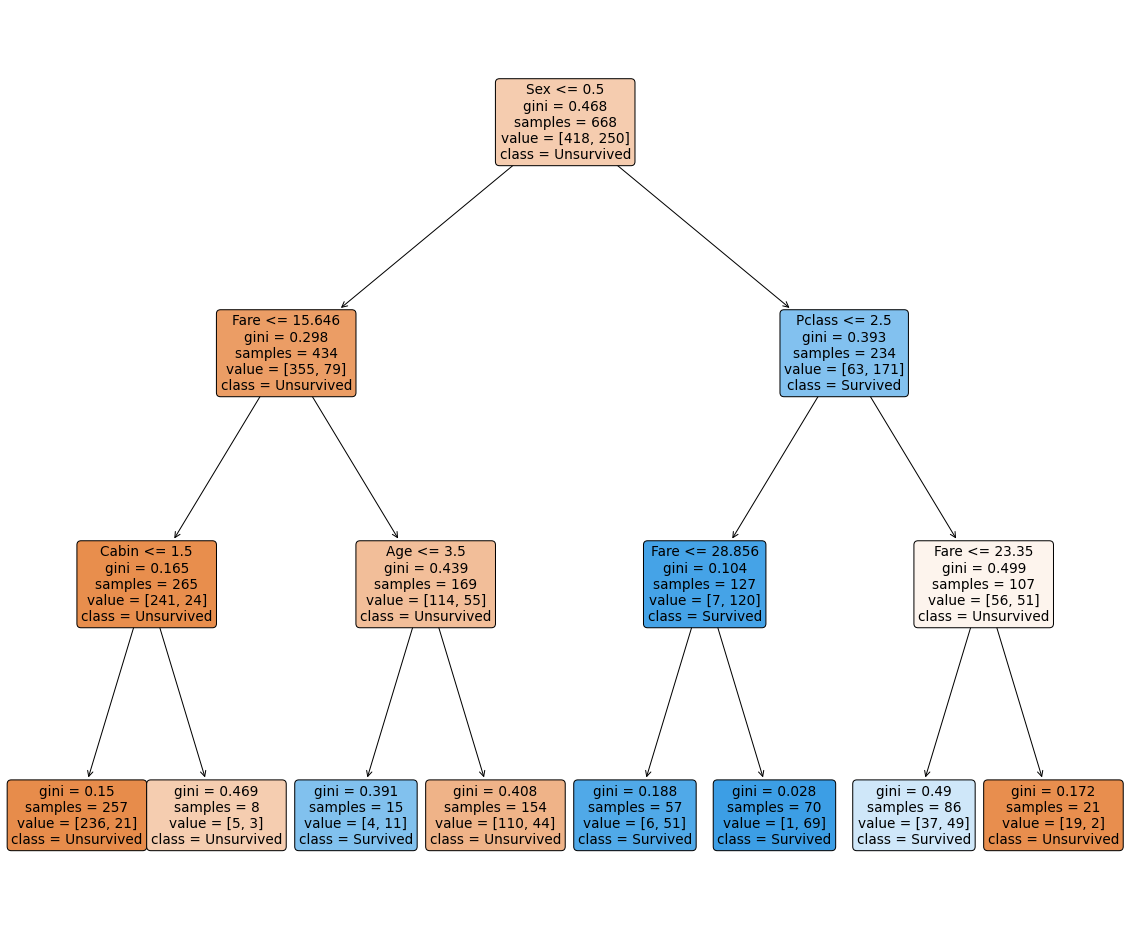

In [46]:
# 시각화 : 하이퍼파라미터 적용한 모델
plt.figure(figsize=(20, 17))
feature_name=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize']
tree.plot_tree(best_dclf, class_names=['Unsurvived', 'Survived'], feature_names=feature_name, impurity=True, filled=True, rounded=True)